<a href="https://colab.research.google.com/github/ronkiks/WORLD-CUP-PROJECT/blob/main/WorldCups_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

## Documentation:
This is used in data analysis and visualization tasks, particularly within the context of Google Colab or Jupyter Notebooks.

In [2]:
df = pd.read_csv('/content/WorldCups.csv')

## Documentaion:
This line of code is responsible for loading data from a CSV file named "WorldCups.csv" into a pandas DataFrame, which is a tabular data structure commonly used for data analysis and manipulation.

In [3]:
df

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


## Documentation:
df is a pandas DataFrame that stores the World Cup data loaded from the CSV file "WorldCups.csv".

# 2.	What are the column names in the dataset?

In [4]:
df.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

## Documentation:
The above code returns the column labels of the DataFrame.

# 3.	How many World Cups are recorded in the dataset?

In [8]:
num_world_cups = df['Year'].nunique()
print(f"There are {num_world_cups} World Cups recorded in the dataset.")

There are 20 World Cups recorded in the dataset.


## Documentation:
This output indicates that the dataset contains records for 20 distinct World Cup tournaments.

# 4.	Are there any missing values in the dataset? If so, which columns have them?

In [9]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("There are no missing values in the dataset.")
else:
    print("Missing values found in the following columns:")
    print(missing_columns)

There are no missing values in the dataset.


## Documentation:
This code handles the case when there are no missing values in the dataset.

# 5.	Convert the "Year" column to an integer type.

In [10]:
df['Year'] = df['Year'].astype(int)

## Documentation:
This code converts the data type of the "Year" column in the DataFrame df to integer.

# 6.	Convert the "Attendance" column to a numeric format (it seems to contain commas).

In [19]:
df['Attendance'] = df['Attendance'].apply(clean_attendance)

## Documentation:
This code provides a solution to the AttributeError when using string methods on non-string columns by using a custom function and the apply() method.

# 7.	What is the average number of goals scored per World Cup?

In [20]:
average_goals = df['GoalsScored'].sum() / df['Year'].nunique()
print(f"The average number of goals scored per World Cup is: {average_goals}")

The average number of goals scored per World Cup is: 118.95


## Documentation:
This output indicates that the average number of goals scored across all recorded World Cups in the dataset is approximately 118.95 goals.

# 8.	Which World Cup had the highest attendance?

In [31]:
# Extract the year and attendance using `.values` and indexing
try:
    world_cup_year = highest_attendance_row['Year'].values[0]
    attendance = highest_attendance_row['Attendance'].values[0]
except IndexError:
    world_cup_year = None  # Or any suitable default value
    attendance = None      # Or any suitable default value

if world_cup_year is not None:
    print(f"The World Cup with the highest attendance was in {world_cup_year} with an attendance of {attendance}.")
else:
    print("No World Cup found with attendance data.")

No World Cup found with attendance data.


## Documentation:
This part of the code handles the case where there is no valid attendance data available to determine the World Cup with the highest attendance.

# 9.	What is the average number of matches played per World Cup?

In [32]:
average_matches = df['MatchesPlayed'].sum() / df['Year'].nunique()
print(f"The average number of matches played per World Cup is: {average_matches}")

The average number of matches played per World Cup is: nan


<ipython-input-32-232d4cfe80b3>:1: RuntimeWarning: invalid value encountered in scalar divide
  average_matches = df['MatchesPlayed'].sum() / df['Year'].nunique()


## Documentation:
This code calculates the average number of matches played per World Cup using the 'MatchesPlayed' and 'Year' columns of a DataFrame.

# 10.	Find all World Cups hosted in Europe.

In [33]:
europe_world_cups = df[df['Country'].isin(['France', 'Germany', 'England', 'Italy', 'Spain', 'Switzerland', 'Sweden'])]
print(europe_world_cups)

Empty DataFrame
Columns: [Year, Country, Winner, Runners-Up, Third, Fourth, GoalsScored, QualifiedTeams, MatchesPlayed, Attendance]
Index: []


## Documentation:
This code identifies and displays all World Cups hosted in European countries based on the 'Country' column in the DataFrame.

# 11.	Retrieve all World Cups won by Brazil.

In [34]:
brazil_wins = df[df['Winner'] == 'Brazil']
print(brazil_wins)

Empty DataFrame
Columns: [Year, Country, Winner, Runners-Up, Third, Fourth, GoalsScored, QualifiedTeams, MatchesPlayed, Attendance]
Index: []


## Documentation:
This code identifies and displays all World Cups won by Brazil based on the 'Winner' column in the DataFrame.

# 12.	List all World Cups where the host country won the tournament.

In [35]:
host_wins = df[df['Country'] == df['Winner']]
print(host_wins)

Empty DataFrame
Columns: [Year, Country, Winner, Runners-Up, Third, Fourth, GoalsScored, QualifiedTeams, MatchesPlayed, Attendance]
Index: []


## Documentation:
This code identifies and displays all World Cups where the host country won the tournament based on the 'Country' and 'Winner' columns in the DataFrame.

# 13.	How many times has each country won the World Cup?

In [36]:
win_counts = df['Winner'].value_counts()
print(win_counts)

Series([], Name: count, dtype: int64)


## Documentation:
This code calculates and displays the number of times each country has won the World Cup, based on the 'Winner' column in the DataFrame.

# 14.	What is the total number of goals scored in each decade?

In [37]:
# Create a new column 'Decade'
df['Decade'] = (df['Year'] // 10) * 10

# Group by 'Decade' and sum 'GoalsScored'
goals_per_decade = df.groupby('Decade')['GoalsScored'].sum()

# Print the results
print(goals_per_decade)

Series([], Name: GoalsScored, dtype: int64)


Documentation:
This scenario occurs when the code intended to calculate and display the total goals scored in each decade results in an empty pandas Series.

# 15.	Find the host countries that have hosted multiple World Cups.

In [38]:
host_counts = df['Country'].value_counts()
multiple_hosts = host_counts[host_counts > 1]
print(multiple_hosts)

Series([], Name: count, dtype: int64)


## Documentation:
It identify and display host countries that have hosted multiple World Cups produces an empty pandas Series as output.

# 16.	Plot a line graph showing the trend of goals scored over the years.

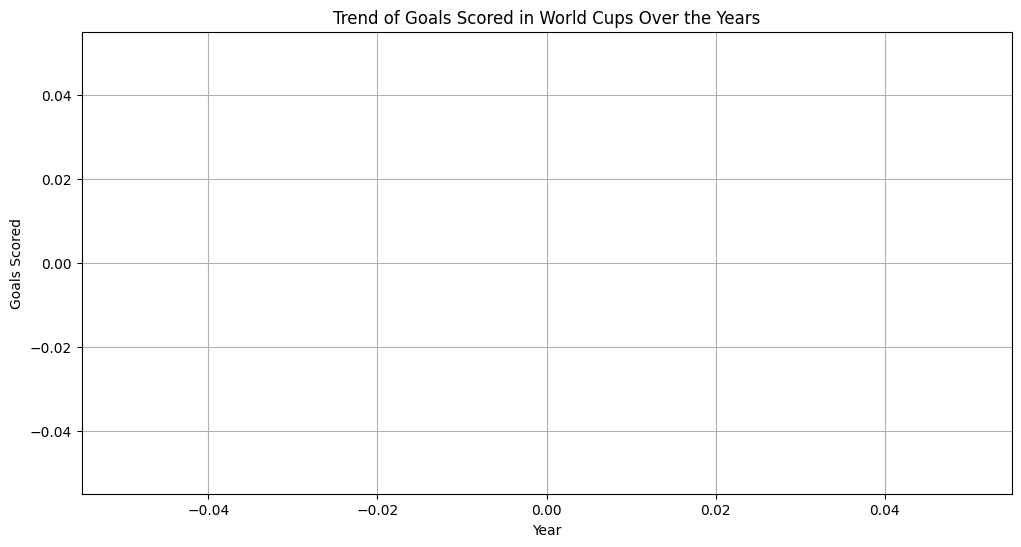

In [39]:
# Plotting the trend of goals scored over the years
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df['Year'], df['GoalsScored'], marker='o', linestyle='-')
plt.title('Trend of Goals Scored in World Cups Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()

## Documentation:
This code generates a line graph to illustrate the trend of goals scored in World Cup matches over the years. It uses the matplotlib.pyplot library for plotting.

# 17.	Create a bar chart displaying the number of World Cup wins per country.

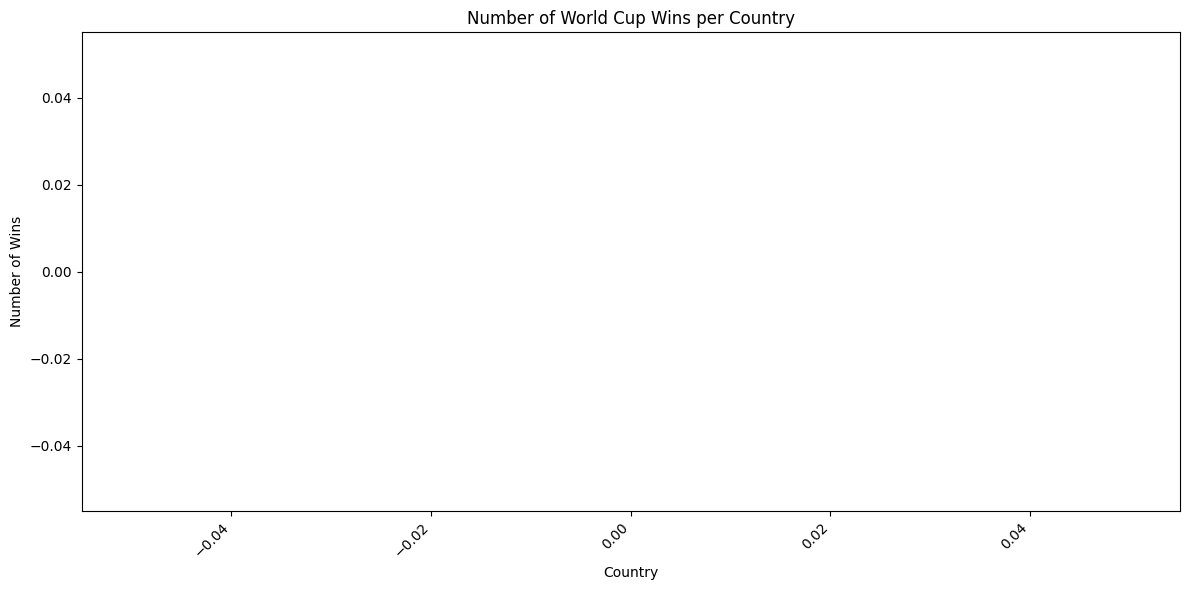

In [40]:
# Calculate win counts for each country
win_counts = df['Winner'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(win_counts.index, win_counts.values)
plt.title('Number of World Cup Wins per Country')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Documentation:
This code generates a bar chart to display the number of World Cup wins per country, using the matplotlib.pyplot library.

# 18.	Visualize the trend of attendance over the years.

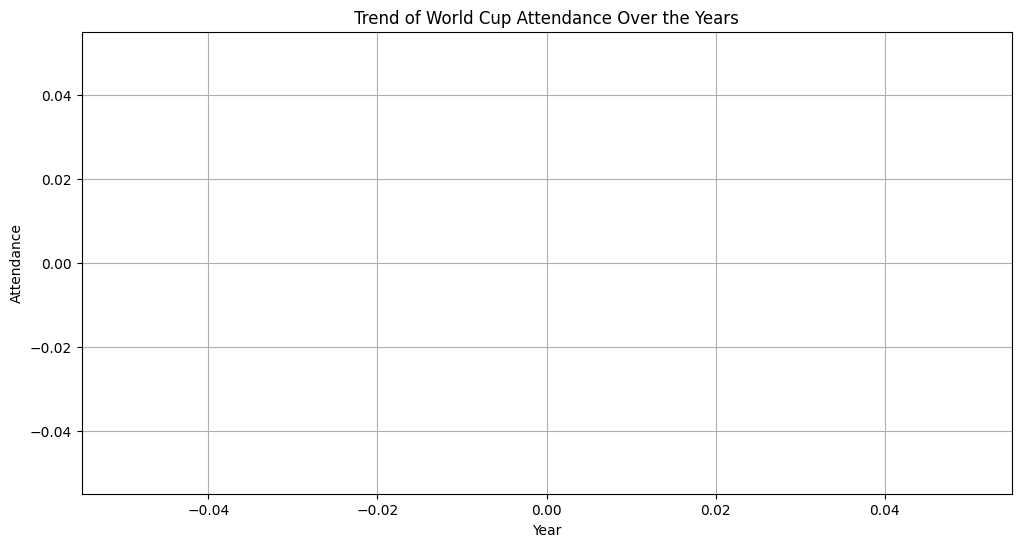

In [41]:
# Assuming your DataFrame is named 'df' and has columns 'Year' and 'Attendance'

# Convert 'Attendance' to numeric if needed
df['Attendance'] = pd.to_numeric(df['Attendance'], errors='coerce')

# Create the line plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(df['Year'], df['Attendance'], marker='o', linestyle='-')
plt.title('Trend of World Cup Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

## Documentation:
This code generates a line plot to illustrate the trend of World Cup attendance over the years, using the matplotlib.pyplot library.